<a href="https://colab.research.google.com/github/marko20014/skills-introduction-to-github/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
import missingno as msno
import numpy as np
import plotly.express as px
from scipy.stats import kstest, norm, mannwhitneyu, randint, uniform
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import multiprocessing

multiprocessing.cpu_count()

2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/iot_intrusion_dataset.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
# Dataset Dimension
df.shape

(625783, 86)

In [ ]:
df.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

# **DATA CLEANING**
1. Drop Duplicated rows
2. Filter out redundant columns
3. Handle infinite values
4. Handle missing Values

In [ ]:
# mean percentage of missing values
df.isnull().mean() * 100

,0
Flow_ID,0.0
Src_IP,0.0
Src_Port,0.0
Dst_IP,0.0
Dst_Port,0.0
...,...
Idle_Max,0.0
Idle_Min,0.0
Label,0.0
Cat,0.0


<Axes: >

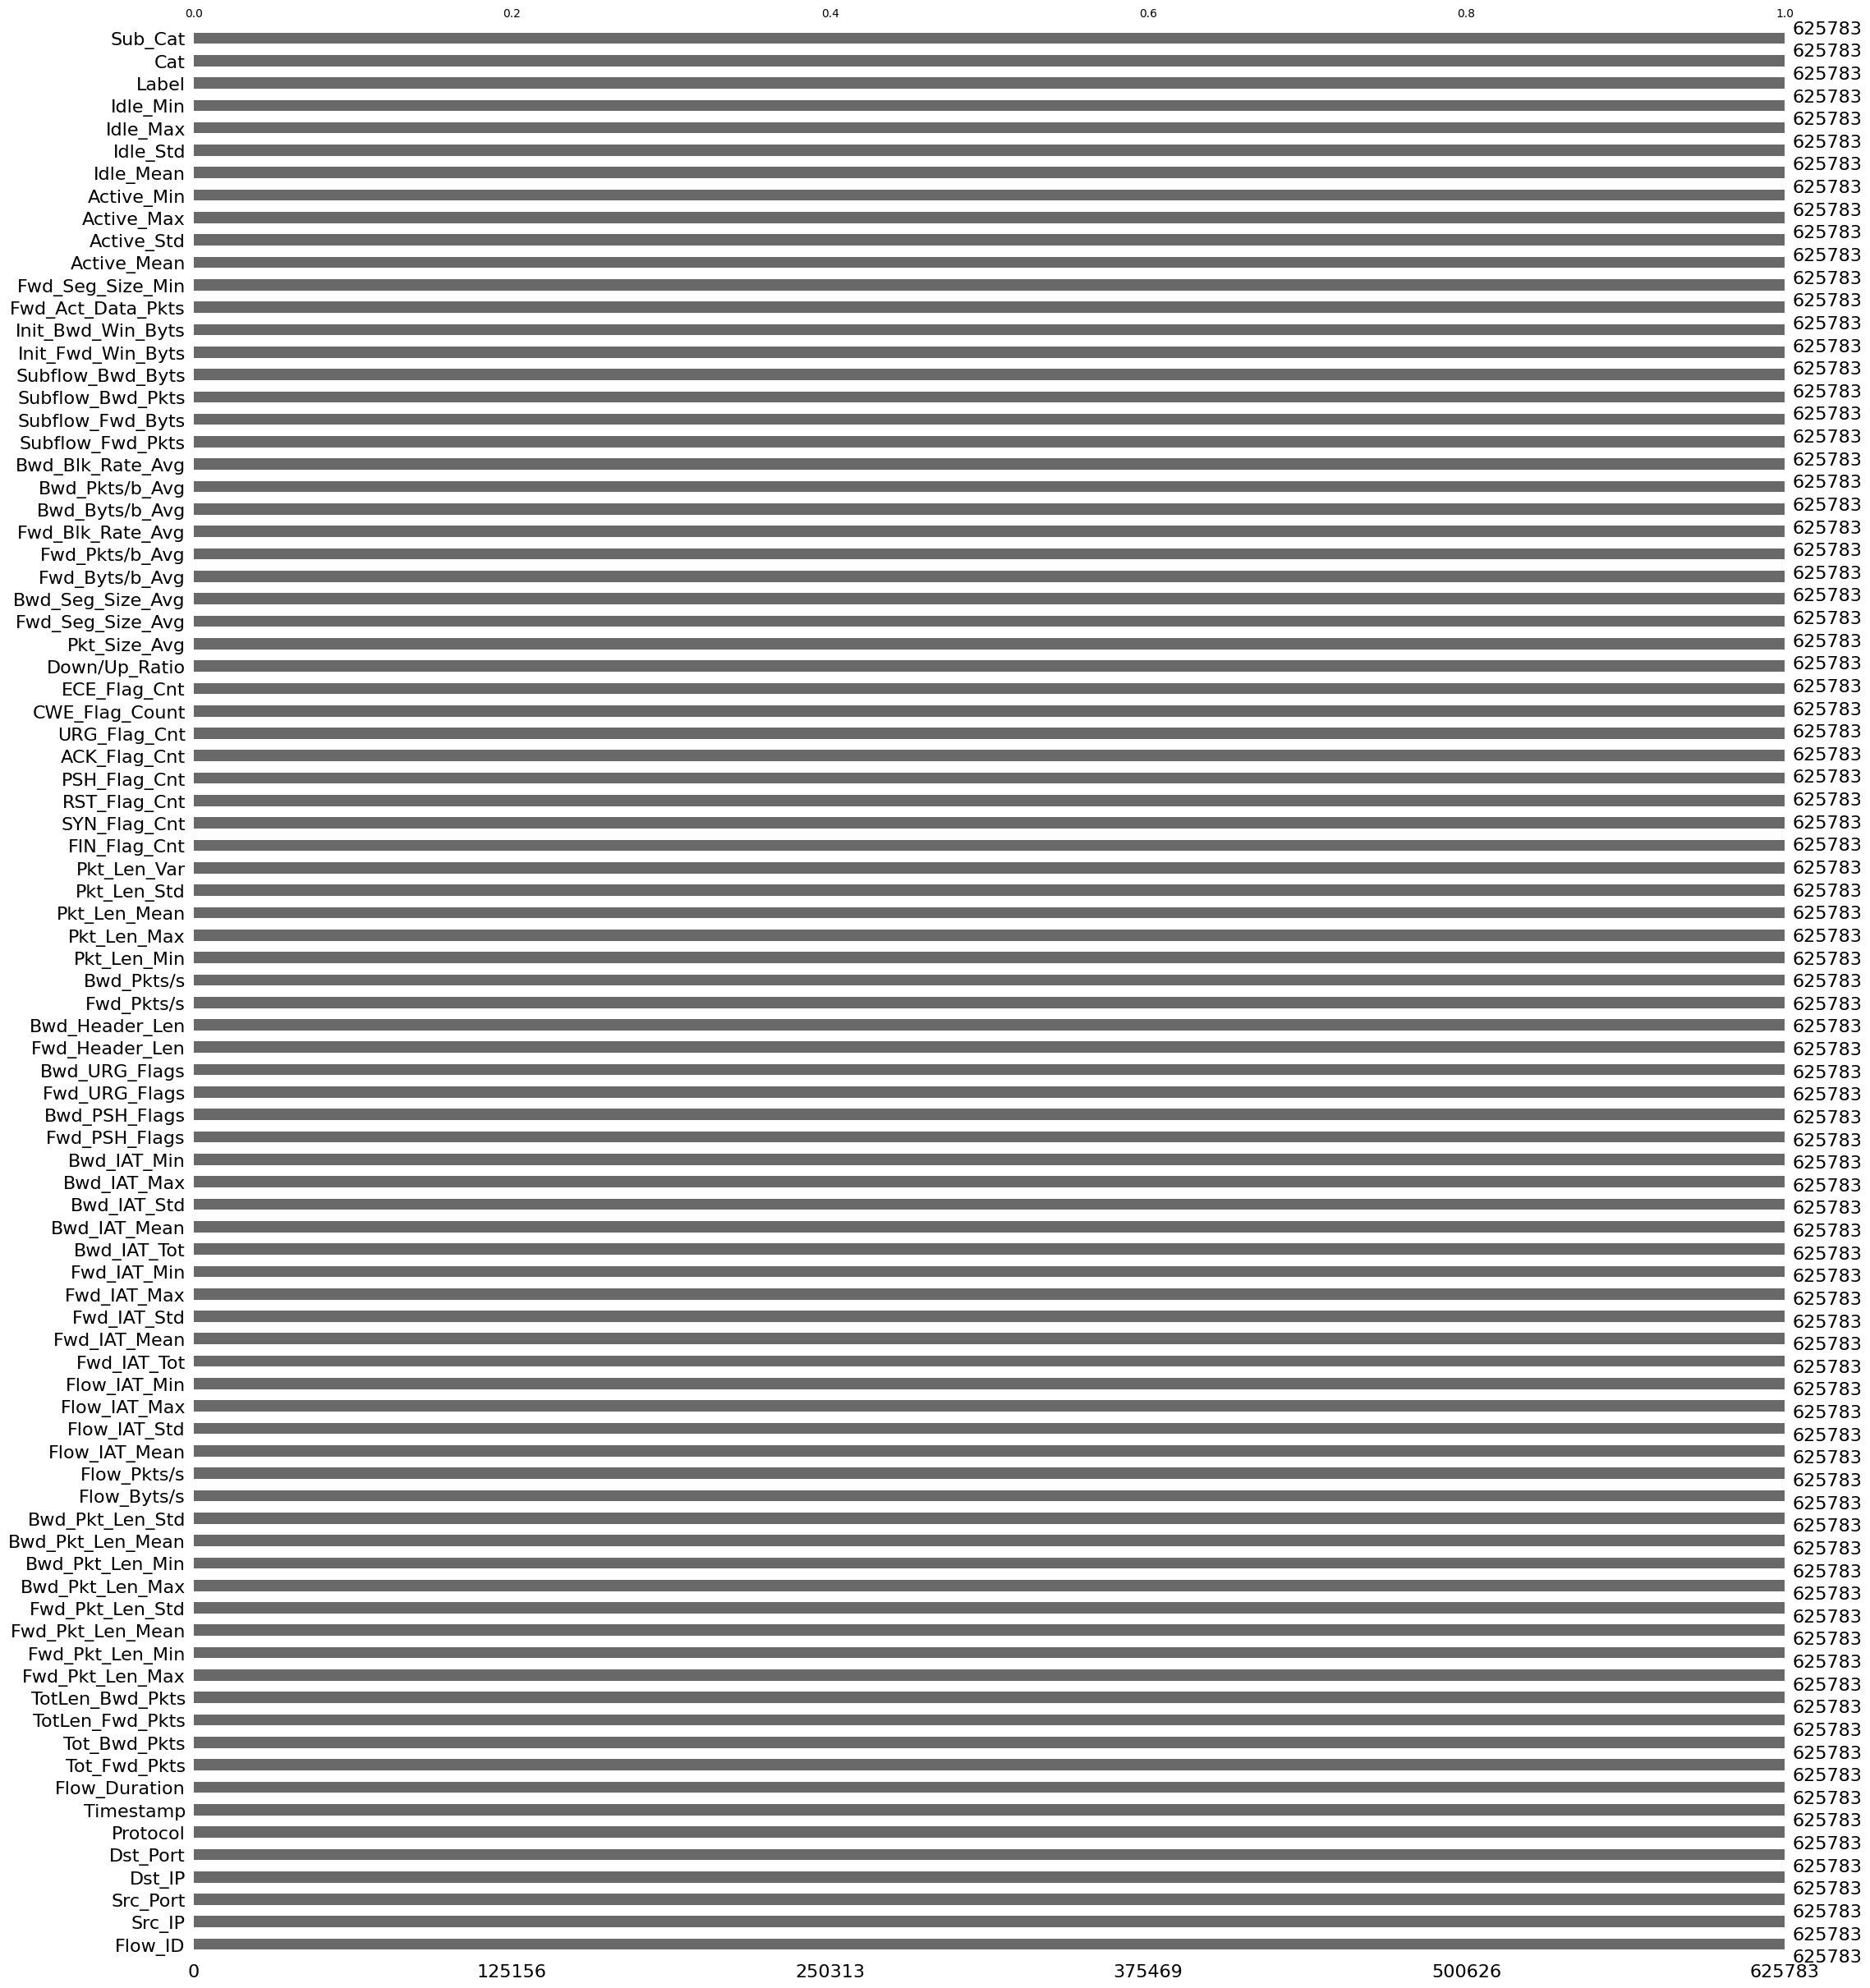

In [ ]:
# No missing values
msno.bar(df)

In [ ]:
# Drop duplicated rows
df.duplicated().sum()

np.int64(164087)

In [ ]:
df = df.drop_duplicates(keep='first', ignore_index=True)

In [ ]:
df.shape

(461696, 86)

In [ ]:
# Flow_Id is  just an ID and has no predictive power
# Sub_Cat is also not useful hence dropped

df = df.drop(columns=['Flow_ID', 'Sub_Cat'])

In [ ]:
# Drop columns with only one unique item
df = df.loc[:, df.nunique() > 1]

In [ ]:
# Handle infinite values

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Drop columns with >20% missing values
df = df.dropna(how='any', axis=0)

In [ ]:
df.shape

(461373, 74)

In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].nunique()}')

Src_IP: 57985
Src_Port: 11205
Dst_IP: 478
Dst_Port: 1034
Protocol: 3
Timestamp: 4304
Flow_Duration: 12669
Tot_Fwd_Pkts: 116
Tot_Bwd_Pkts: 42
TotLen_Fwd_Pkts: 2479
TotLen_Bwd_Pkts: 2612
Fwd_Pkt_Len_Max: 1156
Fwd_Pkt_Len_Min: 1165
Fwd_Pkt_Len_Mean: 2174
Fwd_Pkt_Len_Std: 1614
Bwd_Pkt_Len_Max: 1114
Bwd_Pkt_Len_Min: 1191
Bwd_Pkt_Len_Mean: 2619
Bwd_Pkt_Len_Std: 2237
Flow_Byts/s: 32049
Flow_Pkts/s: 19968
Flow_IAT_Mean: 21647
Flow_IAT_Std: 30780
Flow_IAT_Max: 12398
Flow_IAT_Min: 11041
Fwd_IAT_Tot: 1922
Fwd_IAT_Mean: 8377
Fwd_IAT_Std: 18278
Fwd_IAT_Max: 1793
Fwd_IAT_Min: 1196
Bwd_IAT_Tot: 12341
Bwd_IAT_Mean: 13557
Bwd_IAT_Std: 4674
Bwd_IAT_Max: 12223
Bwd_IAT_Min: 11529
Bwd_PSH_Flags: 2
Bwd_URG_Flags: 2
Fwd_Header_Len: 162
Bwd_Header_Len: 86
Fwd_Pkts/s: 9533
Bwd_Pkts/s: 14178
Pkt_Len_Min: 1240
Pkt_Len_Max: 1122
Pkt_Len_Mean: 5458
Pkt_Len_Std: 4820
Pkt_Len_Var: 4961
FIN_Flag_Cnt: 2
SYN_Flag_Cnt: 2
RST_Flag_Cnt: 2
PSH_Flag_Cnt: 2
ACK_Flag_Cnt: 2
URG_Flag_Cnt: 2
CWE_Flag_Count: 2
ECE_Flag_Cnt: 2
Do

# **DATA FORMATTING**
1. Date strings -> datetime data type
2. numbers -> Floats

In [ ]:
# convert Timestamp object to Datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, format='mixed')

In [ ]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
# define string and numerical columns
str_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

In [ ]:
df[str_cols] = df[str_cols].astype(str)

# convert numbers to float32 for memory optimization
df[num_cols] = df[num_cols].astype(np.float32)

In [ ]:
df.dtypes

,0
Src_IP,object
Src_Port,float32
Dst_IP,object
Dst_Port,float32
Protocol,float32
...,...
Idle_Std,float32
Idle_Max,float32
Idle_Min,float32
Label,object


# **DATA EXPLORATION**

**1. Descriptive Statistics**


In [ ]:
df.describe().round(2)

,Src_Port,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,461373.00,461373.00,461373.00,461373,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00,...,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00,461373.00
mean,35941.64,15535.00,9.94,2019-07-15 02:00:02.679552,812.34,1.94,1.49,465.36,792.73,298.46,...,6776.57,1.75,5.11,0.48,5.76,4.70,642.90,69.28,721.52,596.35
min,0.00,0.00,0.00,2019-05-20 04:56:14,1.00,0.00,1.00,0.00,0.00,0.00,...,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9020.00,8043.00,6.00,2019-06-04 23:44:13,75.00,0.00,1.00,0.00,0.00,0.00,...,-1.00,0.00,0.00,0.00,0.00,0.00,71.50,0.00,73.00,69.00
50%,51994.00,9020.00,6.00,2019-07-25 03:20:49,141.00,1.00,1.00,20.00,32.00,18.00,...,252.00,1.00,0.00,0.00,0.00,0.00,88.00,0.00,112.00,77.00
75%,56361.00,10101.00,17.00,2019-07-25 03:25:25,246.00,2.00,2.00,288.00,1430.00,32.00,...,6720.00,2.00,0.00,0.00,0.00,0.00,149.00,2.16,175.00,142.00
max,65500.00,65371.00,17.00,2019-09-10 01:54:23,99984.00,186.00,560.00,109846.00,773284.00,1464.00,...,65535.00,186.00,9044.62,8598.66,26785.00,6659.00,99973.00,67071.91,99973.00,99973.00
std,24608.14,17148.21,5.38,NaN,4057.85,4.97,1.36,1168.71,1899.60,558.02,...,11974.46,4.99,79.11,24.13,103.45,74.52,2444.06,1341.45,3325.54,2235.97


**2. Data Visualization**

In [ ]:
# set the visualization theme
sns.set_theme(style='darkgrid')


In [ ]:
#Determine the two label class dataframes
df_anomly = df[df['Label'] == 'Anomaly']
df_normal = df[df['Label'] == 'Normal']

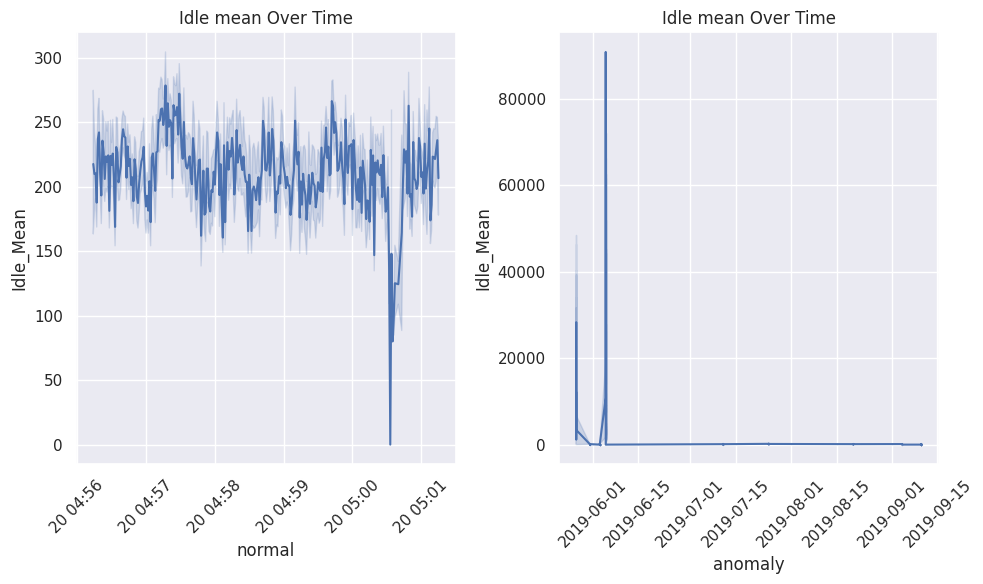

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
lineplot = sns.lineplot(data=df_normal, x='Timestamp', y='Idle_Mean', ax=ax[0])
lineplot.set(title='Idle mean Over Time', xlabel='normal')
lineplot.tick_params(axis='x', rotation=45)

lineplot = sns.lineplot(data=df_anomly, x='Timestamp', y='Idle_Mean', ax=ax[1])
lineplot.set(title='Idle mean Over Time', xlabel='anomaly')
lineplot.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


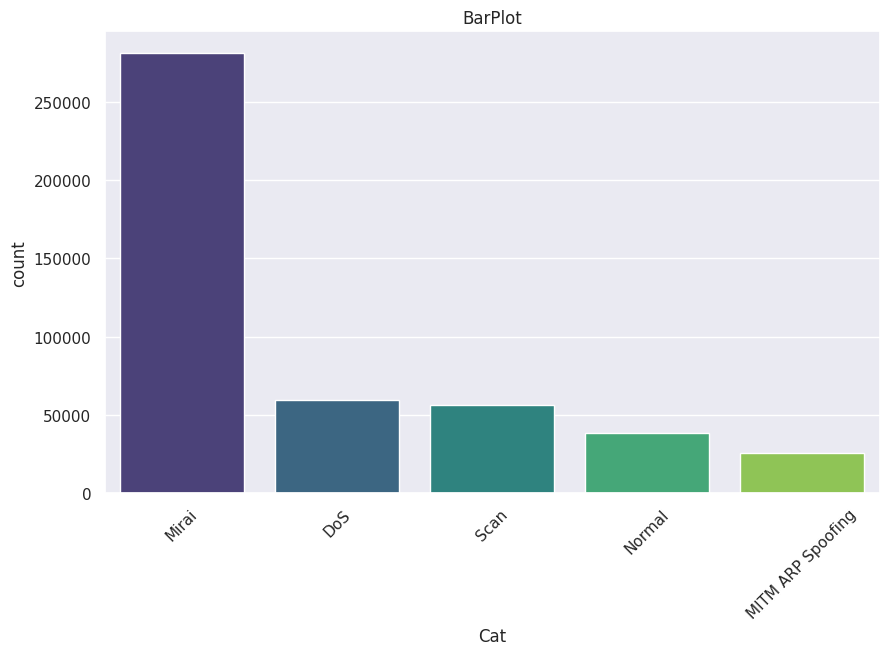

In [ ]:
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 6))
countplot = sns.countplot(data=df, x='Cat', hue='Cat',legend=False, palette='viridis', ax=ax1)
countplot.set(title='BarPlot')
countplot.tick_params(axis='x', rotation=45)
plt.show()

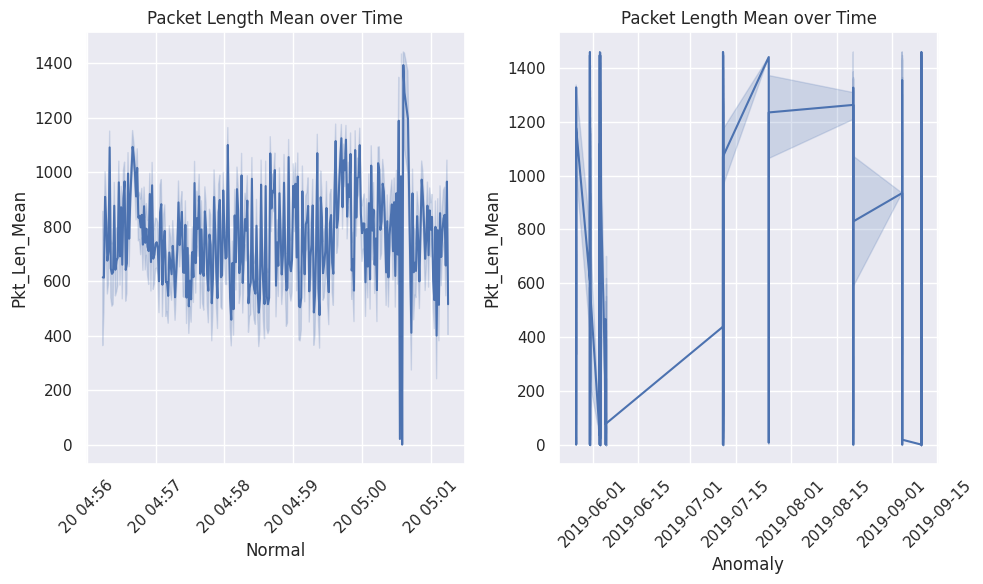

In [ ]:
# visualize the variation of packet length mean over time
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 6))
line = sns.lineplot(data=df_normal, x='Timestamp', y='Pkt_Len_Mean', ax=ax2[0])
line.set(title='Packet Length Mean over Time', xlabel='Normal')
line.tick_params(axis='x', rotation=45)

line = sns.lineplot(data=df_anomly, x='Timestamp', y='Pkt_Len_Mean', ax=ax2[1])
line.set(title='Packet Length Mean over Time', xlabel='Anomaly')
line.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


**3. Correlation Analysis**

In [ ]:
# Correlation
corr_matrix = df.corr(numeric_only=True).round(2)

In [ ]:
corr_matrix

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Src_Port,1.00,-0.54,0.53,-0.18,0.24,-0.08,-0.21,0.00,-0.37,-0.34,...,-0.12,0.23,-0.07,-0.01,-0.06,-0.07,-0.26,-0.02,-0.21,-0.28
Dst_Port,-0.54,1.00,-0.26,-0.07,-0.04,-0.06,0.34,0.04,0.53,0.47,...,0.02,-0.03,-0.02,0.01,-0.01,-0.02,-0.13,0.01,-0.09,-0.14
Protocol,0.53,-0.26,1.00,-0.10,0.34,-0.21,0.07,-0.18,0.00,0.01,...,-0.42,0.37,-0.03,0.00,-0.02,-0.04,-0.16,-0.01,-0.12,-0.17
Flow_Duration,-0.18,-0.07,-0.10,1.00,-0.01,0.22,0.12,0.03,-0.04,-0.05,...,0.07,-0.01,0.32,0.34,0.36,0.24,0.80,0.73,0.96,0.58
Tot_Fwd_Pkts,0.24,-0.04,0.34,-0.01,1.00,-0.09,0.20,-0.07,-0.02,-0.04,...,-0.14,0.99,0.04,0.09,0.07,0.02,-0.08,0.02,-0.04,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active_Min,-0.07,-0.02,-0.04,0.24,0.02,0.08,0.00,0.01,-0.02,-0.03,...,0.01,-0.01,0.96,0.09,0.77,1.00,0.18,0.16,0.21,0.13
Idle_Mean,-0.26,-0.13,-0.16,0.80,-0.08,0.11,-0.04,-0.07,-0.09,-0.09,...,0.10,-0.07,0.19,0.07,0.16,0.18,1.00,0.40,0.90,0.93
Idle_Std,-0.02,0.01,-0.01,0.73,0.02,0.09,0.08,0.02,0.02,0.01,...,0.02,0.01,0.20,0.19,0.21,0.16,0.40,1.00,0.72,0.04
Idle_Max,-0.21,-0.09,-0.12,0.96,-0.04,0.15,0.02,-0.03,-0.06,-0.06,...,0.08,-0.04,0.25,0.20,0.25,0.21,0.90,0.72,1.00,0.70


In [ ]:
fig4 = px.imshow(corr_matrix, color_continuous_scale='viridis',
                range_color=[-1,1],
                width=1000, height=1000)
fig4.update_layout(title='Correlation Matrix')
fig4.show()

# **STATISTICAL INFERENCE**

Hypothesis 1:

Ho: The mean packet length for normal and Anomaly traffic is the same

Ha: Anomaly traffic has a significantly different packet length.


In [ ]:
# Normality test: Check if Packet length is normally distributed for both normal and Anomaly traffic using Kolmogrov Smirnov Test

# sets
normal_pkt_len = df[df['Label'] == 'Normal']['Pkt_Len_Mean']
anomaly_pkt_len = df[df['Label'] == 'Anomaly']['Pkt_Len_Mean']

# Normality test
ks_statistic, p_value = kstest(normal_pkt_len, 'norm', args=(normal_pkt_len.mean(), normal_pkt_len.std()))
print(f"Normal Traffic: p-value = {p_value}")

ks_statistic, p_value = kstest(anomaly_pkt_len, 'norm', args=(anomaly_pkt_len.mean(), anomaly_pkt_len.std()))
print(f"Anomaly Traffic: p-value = {p_value}")


Normal Traffic: p-value = 0.0
Anomaly Traffic: p-value = 0.0


In [ ]:
anomaly_pkt_len.describe()

,Pkt_Len_Mean
count,423098.000000
mean,487.318329
std,620.613037
min,0.000000
25%,0.000000
50%,32.000000
75%,1276.000000
max,1460.000000


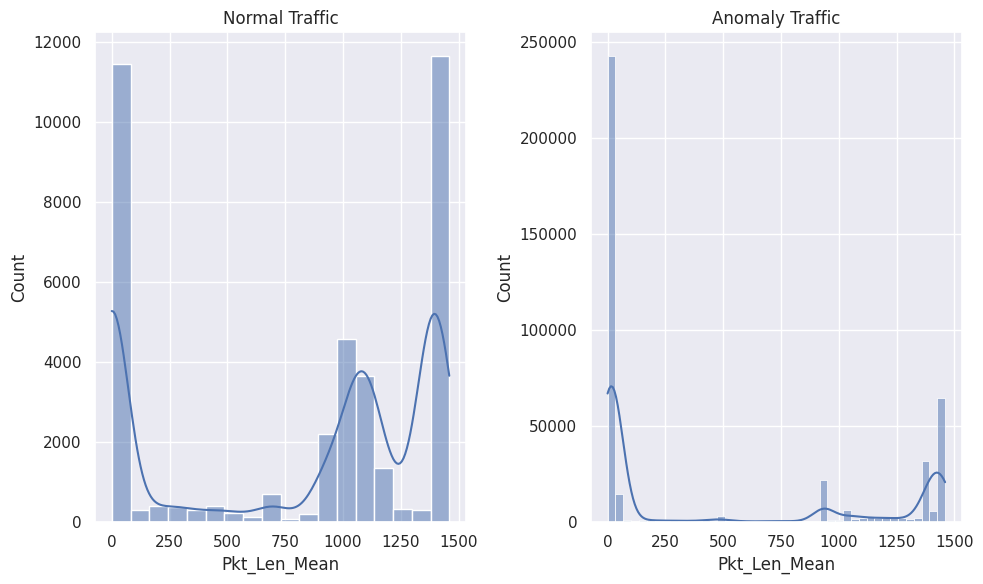

In [ ]:
# Visualize the sets distributions

fig5, ax5 = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(normal_pkt_len, kde=True, ax=ax5[0])
ax5[0].set_title('Normal Traffic')
sns.histplot(anomaly_pkt_len, kde=True, ax=ax5[1])
ax5[1].set(title='Anomaly Traffic')
plt.tight_layout()
plt.show()

The p-value for both sets is less than 0.05 signficance level hence not normal.

Use Mann-Whitney U test.

In [ ]:
u_stat, p_value = mannwhitneyu(normal_pkt_len, anomaly_pkt_len, alternative='two-sided')
print(f"Mann-Whitney U test: U-stat={u_stat}, p-value={p_value}")

# p < 0.05, hence reject Ho​, and conclude that anomaly traffic has significantly different packet length.


Mann-Whitney U test: U-stat=9409846813.5, p-value=0.0


Hypothesis 2:

Ho: The mean idle rates for normal and anomaly network traffic are the same.

Ha: anomaly traffic has a significantly different idle rates.


In [ ]:
# check if packet rates is normally distributed:

normal_idle_rate = df[df['Label'] == 'Normal']['Idle_Mean']
anomaly_idle_rate = df[df['Label'] == 'Anomaly']['Idle_Mean']

# Normality test
ks_statistic, p_value = kstest(normal_idle_rate, 'norm', args=(normal_idle_rate.mean(), normal_idle_rate.std()))
print(f"Normal Traffic: p-value = {p_value}")

ks_statistic, p_value = kstest(anomaly_idle_rate, 'norm', args=(anomaly_idle_rate.mean(), anomaly_idle_rate.std()))
print(f"Anomaly Traffic: p-value = {p_value}")

# p-value < 0.05 hence not normal


Normal Traffic: p-value = 0.0
Anomaly Traffic: p-value = 0.0


In [ ]:
normal_idle_rate.describe()

,Idle_Mean
count,38598.000000
mean,214.460678
std,127.594872
min,0.000000
25%,114.666664
50%,169.666672
75%,295.000000
max,550.000000


In [ ]:
anomaly_idle_rate.describe()

,Idle_Mean
count,423098.000000
mean,681.495605
std,2549.159180
min,0.000000
25%,69.000000
50%,82.000000
75%,138.000000
max,99973.000000


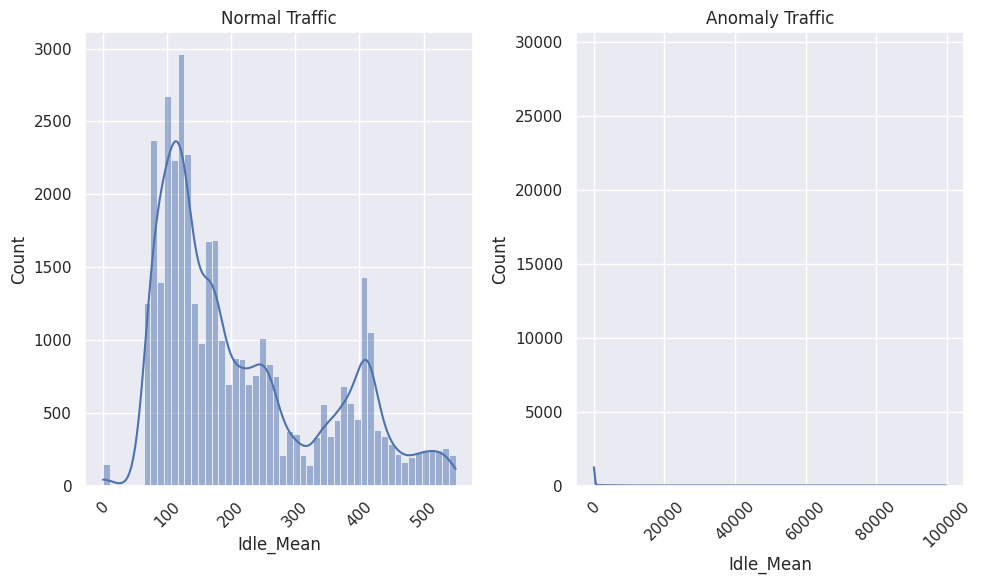

In [ ]:
# Visualize the distribution of idle rates:

fig6, ax6 = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(normal_idle_rate, kde=True, ax=ax6[0])
ax6[0].set_title('Normal Traffic')
ax6[0].tick_params(axis='x', rotation=45)

sns.histplot(anomaly_idle_rate, kde=True, ax=ax6[1])
ax6[1].set(title='Anomaly Traffic')
ax6[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

u_stat, p_value = mannwhitneyu(normal_idle_rate, anomaly_idle_rate, alternative='two-sided')
print(f"Mann-Whitney U test: U-stat={u_stat}, p-value={p_value}")

# p-value < 0.05, hence reject Ho and conclude that anomaly traffic has a significantly different idle rates

Mann-Whitney U test: U-stat=11968507105.5, p-value=0.0


In [ ]:
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,192.168.0.13,10000.0,192.168.0.16,10101.0,17.0,2019-07-25 03:25:53,75.0,1.0,1.0,982.0,...,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai
1,222.160.179.132,2179.0,192.168.0.13,554.0,6.0,2019-05-26 22:11:06,5310.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2655.0,2261.327393,4254.0,1056.0,Anomaly,DoS
2,192.168.0.16,52727.0,192.168.0.13,9020.0,6.0,2019-07-11 01:24:48,141.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan
3,192.168.0.16,52964.0,192.168.0.13,9020.0,6.0,2019-09-04 03:58:17,151.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai
4,192.168.0.1,36763.0,239.255.255.250,1900.0,17.0,2019-09-10 01:41:18,153.0,2.0,1.0,886.0,...,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai


# **FEATURE ENGINEERING**

1. Frequency encode High number categorical features like Src_IP
2. Extract Datetime features from timestamp
3. Statified Data Sampling & Splitting data into train and test sets for:

   i. Binary classification.

   ii. Categories classification

4. Encode other categorical features using oneHotEncoder and LabelEncoder
5. Outlier Detection using Isolation Forest
6. Transform the data into approximate Gaussian distribution using Yeo-Johnson transfromation (PowerTransformer)
7. Dimensionality reduction usig Principal Component Analysis(PCA)
8. Handling Imbalanced data using hypbrid sampling

**1. Frequency Encocding**

In [ ]:
# Frequency encode columns like Src_IP and Dst_IP
df['Src_IP_freq'] = df['Src_IP'].map(df['Src_IP'].value_counts())
df['Dst_IP_freq'] = df['Dst_IP'].map(df['Dst_IP'].value_counts())

# drop the Src and Dst IPs
df = df.drop(columns=['Src_IP', 'Dst_IP'])

In [ ]:
df.head()

,Src_Port,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Src_IP_freq,Dst_IP_freq
0,10000.0,10101.0,17.0,2019-07-25 03:25:53,75.0,1.0,1.0,982.0,1430.0,982.0,...,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,159774,90183
1,2179.0,554.0,6.0,2019-05-26 22:11:06,5310.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,2655.0,2261.327393,4254.0,1056.0,Anomaly,DoS,1,136043
2,52727.0,9020.0,6.0,2019-07-11 01:24:48,141.0,0.0,3.0,0.0,2806.0,0.0,...,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,95537,136043
3,52964.0,9020.0,6.0,2019-09-04 03:58:17,151.0,0.0,2.0,0.0,2776.0,0.0,...,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,95537,136043
4,36763.0,1900.0,17.0,2019-09-10 01:41:18,153.0,2.0,1.0,886.0,420.0,452.0,...,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,3251,2053


**2. Extract DateTime Features**

In [ ]:
# Extract important datetime features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

**3. Statified Data Sampling & Splitting**

Stratified Data sampling is performed to reduce the data while preserving the distribution of the labels

Splitting is necessary at this stage, before further preprocessing to avoid data leakages through sklearn models.

In [ ]:
# Determine X feature matrix
X = df.drop(columns=['Label', 'Cat', 'Timestamp'])

In [ ]:
# Determine the target variable for:

# Binary classification
y_bin = df['Label']

# categories classification
y_cat = df['Cat']

In [ ]:
# Sample (30%) of the data
# The random_state parameter is set to int(42) to yield the same results after each successfull run

X_sample, _, y_bin_sample, _, y_cat_sample, _ = train_test_split(X, y_bin, y_cat, train_size=0.3, stratify=y_bin, random_state=42)

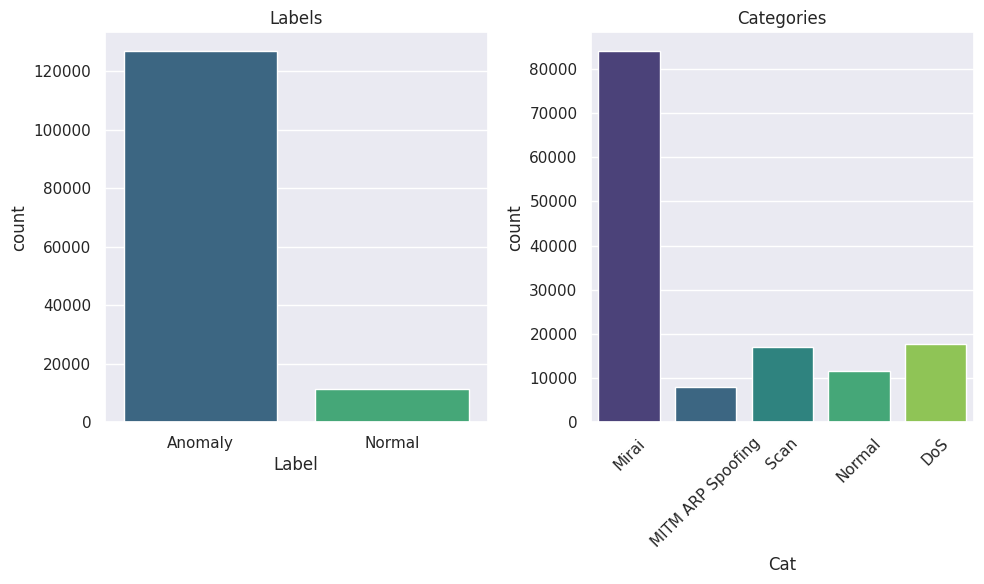

In [ ]:
# the distibution of labels and categories after stratified sampling

fig7, ax7 = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x=y_bin_sample, ax=ax7[0], hue=y_bin_sample, palette='viridis', legend=False)
ax7[0].set_title('Labels')
count_plot = sns.countplot(x=y_cat_sample, ax=ax7[1], hue=y_cat_sample, palette='viridis', legend=False)
ax7[1].set_title('Categories')
count_plot.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# split the remainder data into train and test set for both Binary and Categories classification
X_train, X_test, y_bin_train, y_bin_test, y_cat_train, y_cat_test = train_test_split(X_sample, y_bin_sample, y_cat_sample, test_size=0.25,
                                                                                     random_state=42)

In [ ]:
y_bin_train.shape, y_bin_test.shape

((103808,), (34603,))

In [ ]:
y_cat_train.shape, y_cat_test.shape

((103808,), (34603,))

In [ ]:
X_train.shape, X_test.shape

((103808, 75), (34603, 75))

**4. One Hot Encoding and Label Encoding**


In [ ]:
# To encoder X categorical features
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# To encode y categorical values
label_encoder = LabelEncoder()

In [ ]:
# Get the Categorical values in Protocol column
X['Protocol'].unique()

array([17.,  6.,  0.], dtype=float32)

In [ ]:
# transform the protocol column

encoded_X_train_prot = one_hot_encoder.fit_transform(X_train[['Protocol']])
encoded_X_test_prot = one_hot_encoder.transform(X_test[['Protocol']])

In [ ]:
# convert the transformed columns into dataframe and set indexes

encoded_X_train_prot_df = pd.DataFrame(encoded_X_train_prot, columns=one_hot_encoder.get_feature_names_out())
encoded_X_train_prot_df.set_index(X_train.index, inplace=True)

encoded_X_test_prot_df = pd.DataFrame(encoded_X_test_prot, columns=one_hot_encoder.get_feature_names_out())
encoded_X_test_prot_df.set_index(X_test.index, inplace=True)

In [ ]:
# concat the dataframes to the original train and test splits and drop the previous uncoded protocol column

X_train = pd.concat([X_train.drop(columns=['Protocol']), encoded_X_train_prot_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Protocol']), encoded_X_test_prot_df], axis=1)

In [ ]:
# Transform the target variable from train and test sets for:

# Binary classifcation
y_bin_train = label_encoder.fit_transform(y_bin_train)
y_bin_test = label_encoder.transform(y_bin_test)

# Categories Classification
y_cat_train = label_encoder.fit_transform(y_cat_train)
y_cat_test = label_encoder.transform(y_cat_test)

In [ ]:
X_train.head()

,Src_Port,Dst_Port,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Idle_Min,Src_IP_freq,Dst_IP_freq,Year,Month,Day,Hour,Protocol_0.0,Protocol_6.0,Protocol_17.0
330708,43915.0,443.0,145.0,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,72.0,94943,318,2019,9,10,1,0.0,1.0,0.0
211915,60088.0,8899.0,14.0,4.0,1.0,128.0,32.0,32.0,32.0,32.000000,...,6.0,159774,118653,2019,7,25,3,0.0,0.0,1.0
461212,9020.0,49784.0,490.0,5.0,1.0,5582.0,1388.0,1388.0,30.0,1116.400024,...,74.0,159774,90183,2019,5,20,4,0.0,1.0,0.0
230421,9020.0,49784.0,474.0,3.0,1.0,2806.0,1388.0,1388.0,30.0,935.333313,...,74.0,159774,90183,2019,5,20,4,0.0,1.0,0.0
390251,52717.0,9020.0,143.0,0.0,3.0,0.0,2806.0,0.0,0.0,0.000000,...,69.0,95537,136043,2019,7,11,1,0.0,1.0,0.0


In [ ]:
X_train.shape

(103808, 77)

In [ ]:
y_bin_train

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_cat_train

array([2, 2, 3, ..., 2, 0, 0])

**5. Transform to approximate Gaussian distribution**

In [ ]:
# Most sklearn models work properly with standardized data
# Transform the data to approximate Gaussian using Yeo-Johnson transform

pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [ ]:
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

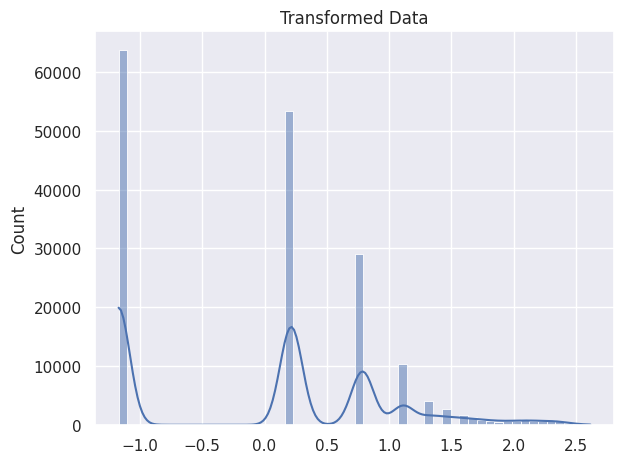

In [ ]:
# visualize the resulting distibution

hist = sns.histplot(X_train[:, 3], kde=True)
hist.set(title='Transformed Data')
plt.tight_layout()
plt.show()

**6. Outlier Detection**

An outlier is a data point that is significantly different from other observations in a dataset. It lies far outside the expected range of values and may indicate errors, rare events, or valuable insights depending on the context.

In [ ]:
# IsolationForest model is used to detect
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Predict outliers (-1 for outliers, 1 for normal)
iso_forest_pred = iso_forest.fit_predict(X_train)

In [ ]:
iso_forest_pred

array([1, 1, 1, ..., 1, 1, 1])

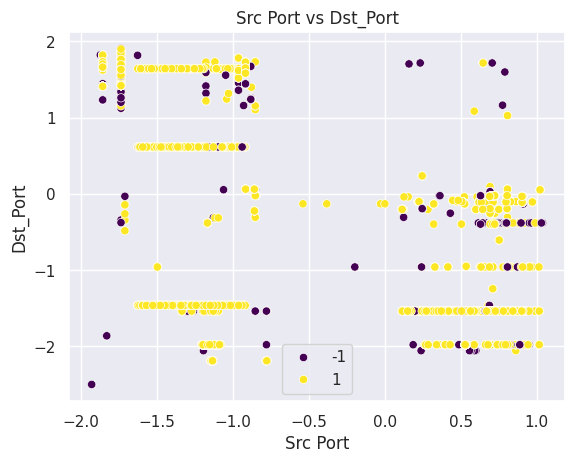

In [ ]:
# Visualize outlier in Src Port vs Dst_Port
scatter = sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=iso_forest_pred, palette='viridis')
scatter.set(title='Src Port vs Dst_Port', xlabel='Src Port', ylabel='Dst_Port')
plt.show()

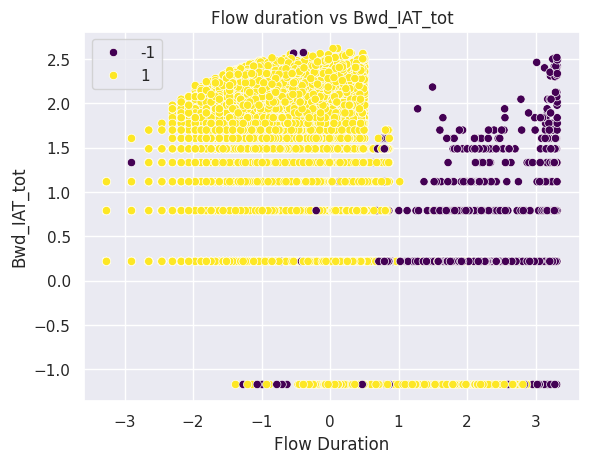

In [ ]:
# Visualize outlier in Flow duration vs Bwd_IAT_tot

scatter = sns.scatterplot(x=X_train[:, 2], y=X_train[:, 3], hue=iso_forest_pred, palette='viridis')
scatter.set(title='Flow duration vs Bwd_IAT_tot', xlabel='Flow Duration', ylabel='Bwd_IAT_tot')
plt.show()

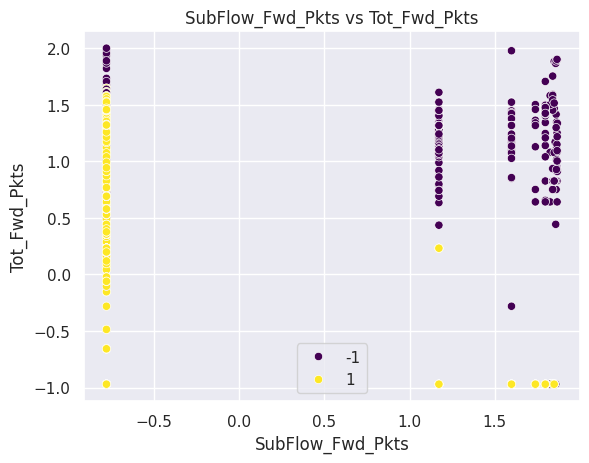

In [ ]:
# visualize outlier in SubFlow_Fwd_Pkts vs Tot_Fwd_Pkts

scatter = sns.scatterplot(x=X_train[:, 4], y=X_train[:, 5], hue=iso_forest_pred, palette='viridis')
scatter.set(title='SubFlow_Fwd_Pkts vs Tot_Fwd_Pkts', xlabel='SubFlow_Fwd_Pkts', ylabel='Tot_Fwd_Pkts')
plt.show()

**7. Dimensionality Reduction**

Reduce the number of features while retaining much of the original data's variability

In [ ]:
pca = PCA(n_components=0.95, svd_solver='full', random_state=42)

In [ ]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(103808, 20)

In [ ]:
X_test.shape

(34603, 20)

**8. Handling Imbalanced Data**

This prevents over fitting the model (bias) hence better model performance

In [ ]:
# SMOTEEN is Hybrid Sampling (SMOTE + Undersampling) - First oversamples the minority class using SMOTE then
# undersamples the majority class t o avoid overfitting.

# Define Hybrid sampler
smote_enn = SMOTEENN(random_state=42)

# Resample for binary target variable
X_bin_train, y_bin_train = smote_enn.fit_resample(X_train, y_bin_train)

# Resample for categories target variable
X_cat_train, y_cat_train = smote_enn.fit_resample(X_train, y_cat_train)


In [ ]:
X_bin_train.shape

(189994, 20)

In [ ]:
y_cat_train.shape

(314735,)

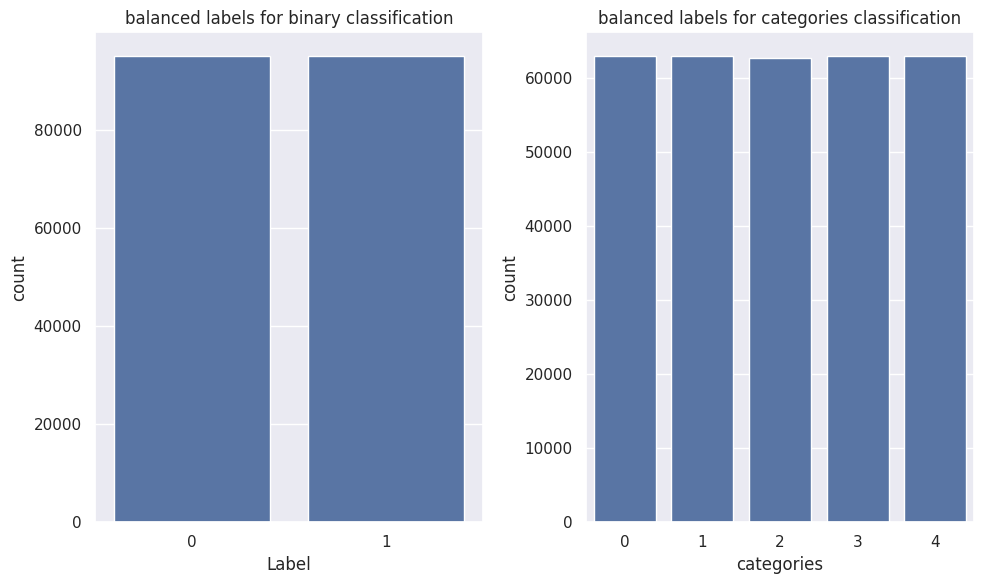

In [ ]:
fig7, ax7 = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x=y_bin_train, ax=ax7[0])
ax7[0].set_title('balanced labels for binary classification')
ax7[0].set_xlabel('Label')
sns.countplot(x=y_cat_train, ax=ax7[1])
ax7[1].set_title('balanced labels for categories classification')
ax7[1].set_xlabel('categories')
plt.tight_layout()
plt.show()

# **CROSS VALIDATION, MODEL TRAINING & EVALUATION**

**1. BINARY CLASSIFICATION**

**a) RandomForest Classifier**



In [ ]:
# Define rng to set a parameter for cv randomstate to yield different result
rng = np.random.RandomState(42)

# Define Cross_validation splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rng)

In [ ]:
# Define parameter distribution
random_forest_param_dist = {'n_estimators': [30, 50, 100], 'max_depth': [2, 3, 5], 'max_features': ['sqrt', None]}

# instantiate the model
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

# Cross validating using randomized search
random_forest_search = RandomizedSearchCV(estimator=random_forest, param_distributions=random_forest_param_dist, n_iter=5, cv=cv, random_state=42, n_jobs=-1)

# model training
random_forest_search.fit(X_bin_train, y_bin_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5],
                                        'max_features': ['sqrt', None],
                                        'n_estimators': [30, 50, 100]},
                   random_state=42)

In [ ]:
# random forest search results
random_forest_results = random_forest_search.cv_results_
random_forest_results_df = pd.DataFrame(random_forest_results)
random_forest_results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.244475,1.053257,0.069467,0.017155,30,sqrt,2,"{'n_estimators': 30, 'max_features': 'sqrt', '...",0.916735,0.921945,0.921524,0.922498,0.918864,0.920313,0.002182,2
1,23.651836,3.671966,0.145100,0.027099,50,sqrt,2,"{'n_estimators': 50, 'max_features': 'sqrt', '...",0.913708,0.917682,0.916682,0.916814,0.914548,0.915887,0.001500,3
2,68.487677,3.058870,0.278487,0.084350,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.968973,0.971499,0.969289,0.972105,0.969104,0.970194,0.001331,1
3,173.378569,23.594865,0.207137,0.056186,100,None,2,"{'n_estimators': 100, 'max_features': None, 'm...",0.876549,0.877655,0.875839,0.877102,0.874941,0.876417,0.000952,5
4,40.601288,3.701431,0.080060,0.030206,30,None,2,"{'n_estimators': 30, 'max_features': None, 'ma...",0.876681,0.877681,0.875970,0.877102,0.874941,0.876475,0.000949,4


In [ ]:
# Predict using best random forest estimator
random_forest_best_estimator = random_forest_search.best_estimator_
y_bin_pred_random_forest = random_forest_best_estimator.predict(X_test)


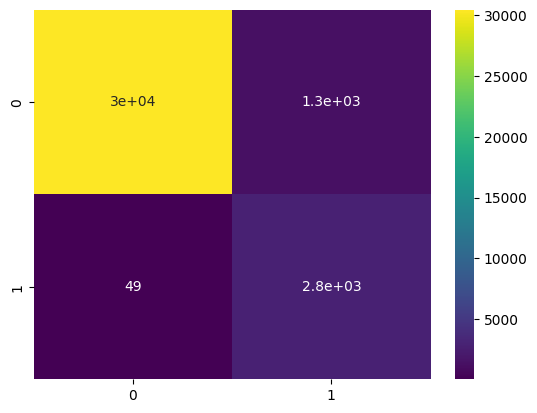

In [ ]:
# confusion matrix display
sns.heatmap(data=confusion_matrix(y_bin_test, y_bin_pred_random_forest), annot=True, cmap='viridis',)
plt.show()

In [ ]:
# classification report
pd.DataFrame(classification_report(y_bin_test, y_bin_pred_random_forest, output_dict=True)).T


,precision,recall,f1-score,support
0,0.998394,0.959349,0.978482,31758.000000
1,0.684120,0.982777,0.806694,2845.000000
accuracy,0.961275,0.961275,0.961275,0.961275
macro avg,0.841257,0.971063,0.892588,34603.000000
weighted avg,0.972555,0.961275,0.964358,34603.000000


**b) XGBoost Classifier**

In [ ]:
# Define Parameter Distribution
xgb_param_dist = {'n_estimators': [30, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [2, 5, 10]}

# Instantiate the model
xgb = XGBClassifier(seed=42, objective='binary:logistic')

# Cross validating
xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_dist, n_iter=5, cv=cv, random_state=42, n_jobs=-1)

# model training
xgb_search.fit(X_bin_train, y_bin_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           ga...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [2, 5, 10],
                                        'n_estimators': [30, 50, 100]},
                   random_state=42)

In [ ]:
#  xgb search results
xgb_results = xgb_search.cv_results_
xgb_results_df = pd.DataFrame(xgb_results)
xgb_results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.554664,0.845907,0.337851,0.071029,100,10,0.01,"{'n_estimators': 100, 'max_depth': 10, 'learni...",0.997710,0.996684,0.996737,0.996658,0.996763,0.996910,0.000402,1
1,3.015886,0.574995,0.080925,0.021342,50,5,0.05,"{'n_estimators': 50, 'max_depth': 5, 'learning...",0.992605,0.991579,0.993079,0.992500,0.992842,0.992521,0.000512,3
2,1.482018,0.023708,0.026563,0.001529,30,2,0.05,"{'n_estimators': 30, 'max_depth': 2, 'learning...",0.947867,0.947393,0.950262,0.947393,0.946497,0.947883,0.001270,4
3,1.795974,0.027393,0.048211,0.004519,30,5,0.10,"{'n_estimators': 30, 'max_depth': 5, 'learning...",0.993684,0.993263,0.994105,0.993342,0.994158,0.993710,0.000372,2
4,2.107134,0.383988,0.035708,0.013404,30,2,0.01,"{'n_estimators': 30, 'max_depth': 2, 'learning...",0.883392,0.885286,0.887339,0.882023,0.880731,0.883754,0.002344,5


In [ ]:
# predict using xgb best estimator
xgb_best_estimator = xgb_search.best_estimator_
y_bin_pred_xgb = xgb_best_estimator.predict(X_test)


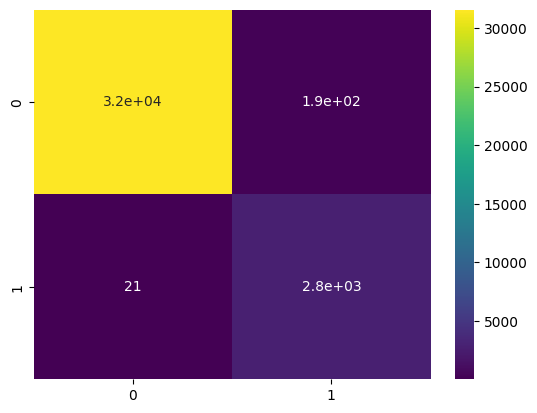

In [ ]:
# confusion matrix display
sns.heatmap(data=confusion_matrix(y_bin_test, y_bin_pred_xgb), annot=True, cmap='viridis',)
plt.show()


In [ ]:
# classification report
pd.DataFrame(classification_report(y_bin_test, y_bin_pred_xgb, output_dict=True)).T


,precision,recall,f1-score,support
0,0.999335,0.993891,0.996606,31758.000000
1,0.935719,0.992619,0.963329,2845.000000
accuracy,0.993787,0.993787,0.993787,0.993787
macro avg,0.967527,0.993255,0.979968,34603.000000
weighted avg,0.994105,0.993787,0.993870,34603.000000


**c) Stochastic Gradient Classifier**

In [ ]:
# Define Parameter Distribution
sgd_param_dist = {'loss': ['hinge', 'log_loss', 'modified_huber'], 'max_iter': [500, 1000, 1500], 'eta0': [0.001, 0.01, 0.1]}

# instantiate the model
sgd = SGDClassifier(learning_rate='optimal', random_state=42)

# Cross validating
sgd_search = RandomizedSearchCV(estimator=sgd, param_distributions=sgd_param_dist, n_iter=5, cv=cv, random_state=42, n_jobs=-1)

# model training
sgd_search.fit(X_bin_train, y_bin_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=SGDClassifier(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'eta0': [0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'max_iter': [500, 1000, 1500]},
                   random_state=42)

In [ ]:
#  SVC search results
sgd_results = sgd_search.cv_results_
sgd_results_df = pd.DataFrame(sgd_results)
sgd_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_loss,param_eta0,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.391995,0.954238,0.003584,0.000182,1500,modified_huber,0.001,"{'max_iter': 1500, 'loss': 'modified_huber', '...",0.966499,0.973947,0.975499,0.965894,0.980157,0.972399,0.005465,3
1,0.988665,0.261954,0.004534,0.002263,1000,log_loss,0.010,"{'max_iter': 1000, 'loss': 'log_loss', 'eta0':...",0.974578,0.972315,0.965552,0.971157,0.971551,0.971031,0.002985,4
2,0.781474,0.067335,0.003484,0.000063,500,hinge,0.010,"{'max_iter': 500, 'loss': 'hinge', 'eta0': 0.01}",0.982631,0.982421,0.979815,0.980526,0.983631,0.981805,0.001414,1
3,1.329673,0.189940,0.007470,0.002267,500,log_loss,0.100,"{'max_iter': 500, 'loss': 'log_loss', 'eta0': ...",0.974578,0.972315,0.965552,0.971157,0.971551,0.971031,0.002985,4
4,1.009702,0.328119,0.003936,0.000847,500,hinge,0.001,"{'max_iter': 500, 'loss': 'hinge', 'eta0': 0.001}",0.982631,0.982421,0.979815,0.980526,0.983631,0.981805,0.001414,1


In [ ]:
# predict using svc best estimator
sgd_best_estimator = sgd_search.best_estimator_
y_bin_pred_sgd = sgd_best_estimator.predict(X_test)

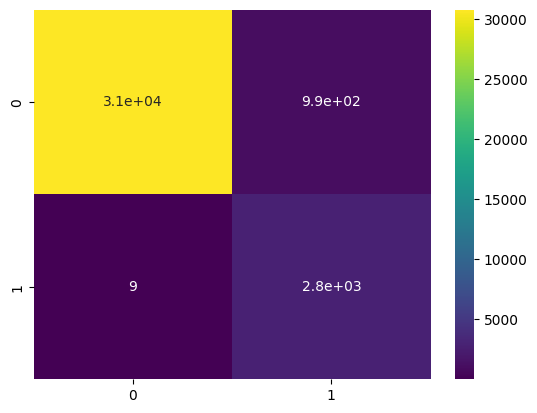

In [ ]:
# confusion matrix display
sns.heatmap(data=confusion_matrix(y_bin_test, y_bin_pred_sgd), annot=True, cmap='viridis',)
plt.show()


In [ ]:
# classification report
pd.DataFrame(classification_report(y_bin_test, y_bin_pred_sgd, output_dict=True)).T


,precision,recall,f1-score,support
0,0.999708,0.968953,0.984090,31758.000000
1,0.742020,0.996837,0.850757,2845.000000
accuracy,0.971245,0.971245,0.971245,0.971245
macro avg,0.870864,0.982895,0.917424,34603.000000
weighted avg,0.978521,0.971245,0.973128,34603.000000


**2. CATEGORIES CLASSIFICATION**

**a) Random Forest**

In [ ]:
# model training
random_forest_search.fit(X_cat_train, y_cat_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5],
                                        'max_features': ['sqrt', None],
                                        'n_estimators': [30, 50, 100]},
                   random_state=42)

In [ ]:
# Predict using best random forest estimator
random_forest_best_estimator = random_forest_search.best_estimator_
y_cat_pred_random_forest = random_forest_best_estimator.predict(X_test)


In [ ]:
# classification report
pd.DataFrame(classification_report(y_cat_test, y_cat_pred_random_forest, output_dict=True)).T


,precision,recall,f1-score,support
0,1.000000,0.973410,0.986526,4513.000000
1,0.521699,0.890454,0.657930,1917.000000
2,0.982170,0.605376,0.749058,21020.000000
3,0.435532,0.879789,0.582635,2845.000000
4,0.459624,0.878598,0.603524,4308.000000
accuracy,0.725746,0.725746,0.725746,0.725746
macro avg,0.679805,0.845525,0.715935,34603.000000
weighted avg,0.848986,0.725746,0.743179,34603.000000


**b) XGBoost Classifier**

In [ ]:
# Instantiate the model
xgb = XGBClassifier(seed=42, objective='multi:softmax')

# Cross validating
xgb_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_dist, n_iter=5, cv=cv, random_state=42, n_jobs=-1)

# model training
xgb_search.fit(X_cat_train, y_cat_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           ga...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [2, 5, 10],
                                        'n_estimators': [30, 50, 100]},
                   random_state=42)

In [ ]:
# Predict using best random forest estimator
xgb_best_estimator = xgb_search.best_estimator_
y_cat_pred_xgb = xgb_best_estimator.predict(X_test)


In [ ]:
# classification report
pd.DataFrame(classification_report(y_cat_test, y_cat_pred_xgb, output_dict=True)).T


,precision,recall,f1-score,support
0,0.999334,0.997341,0.998336,4513.000000
1,0.918683,0.990089,0.953050,1917.000000
2,0.997360,0.988535,0.992928,21020.000000
3,0.985043,0.995431,0.990210,2845.000000
4,0.986124,0.989786,0.987952,4308.000000
accuracy,0.990492,0.990492,0.990492,0.990492
macro avg,0.977309,0.992236,0.984495,34603.000000
weighted avg,0.990847,0.990492,0.990581,34603.000000


**c) Stochastic Gradient Classifier**

In [ ]:
# model training
sgd_search.fit(X_cat_train, y_cat_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x79BF20867D40, shuffle=True),
                   estimator=SGDClassifier(random_state=42), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'eta0': [0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'max_iter': [500, 1000, 1500]},
                   random_state=42)

In [ ]:
# Predict using best random forest estimator
sgd_best_estimator = sgd_search.best_estimator_
y_cat_pred_sgd = sgd_best_estimator.predict(X_test)


In [ ]:
# classification report
pd.DataFrame(classification_report(y_cat_test, y_cat_pred_sgd, output_dict=True)).T

,precision,recall,f1-score,support
0,1.000000,0.994904,0.997445,4513.000000
1,0.596977,0.968179,0.738559,1917.000000
2,0.978965,0.783777,0.870565,21020.000000
3,0.934540,0.943409,0.938954,2845.000000
4,0.536355,0.909239,0.674705,4308.000000
accuracy,0.850273,0.850273,0.850273,0.850273
macro avg,0.809367,0.919902,0.844046,34603.000000
weighted avg,0.901790,0.850273,0.861038,34603.000000


**END**